In [1]:
import math
import numpy as np
import pylab as pl
%matplotlib inline

In [2]:
x = 10
arreglo = np.random.randint(2,100,(x))
print arreglo

[62 27 92 37 21 84 85 76 55 50]


<h1> Subsecuencia de Suma Máxima n3 </h1>

In [3]:
def sub1(arreglo):
    tam = len(arreglo)
    maximo=0
    for i in range(tam):
        for j in range(tam-i):
            suma=0
            k=i
            for k in range(j):
                suma = suma + arreglo[k+i]
            if suma>maximo:
                maximo=suma
    print maximo

In [4]:
A=[-2,11,-4,13,-5,-2]
sub1(A)

20


<h1> Subsecuencia de Suma Máxima Dividir y Conquistar </h1>

In [20]:
class Aux:
    def __init__(self):
        self.i = 0
        self.j = 0
        self.maximo = 0

def sub2(arreglo,i,j):
    if((j-1)-i <= 1):
        j=j-1
        a = Aux()
        if(arreglo[j]>=0 and arreglo[i] >= 0 and i <> j):
            a.i = i
            a.j = j
            a.maximo = arreglo[i] + arreglo[j]
            return a
        else:
            if(arreglo[j] > arreglo[i]):
                a.i=j
                a.j=j
                a.maximo = arreglo[j]
                return a
            else:
                a.i=i
                a.j=i
                a.maximo = arreglo[i]
                return a
    else:
        resp1 = Aux()
        resp2 = Aux()
        tam = j-i
        tam = tam / 2
        resp1 = sub2(arreglo, i,tam+i)
        resp2 = sub2(arreglo,tam+i,j)
        vuelta = Aux()
        vuelta.i = tam
        vuelta.j = tam
        vuelta.maximo = -100
        suma=0
        maxi1=0
        for x in range(tam,i,-1):
            suma = suma + arreglo[x]
            if (suma > maxi1):
                vuelta.i=x
                maxi1=suma
        maxi2=0
        suma=0
        for x in range(tam+1,j):
            suma = suma + arreglo[x]
            if (suma > maxi2):
                vuelta.j=x
                maxi2=suma
        if(maxi1+maxi2>0):
            vuelta.maximo = maxi1+maxi2
                
        if(vuelta.maximo >= resp1.maximo and vuelta.maximo >= resp2.maximo):
            return vuelta
        else:
            if(resp1.maximo > resp2.maximo):
                return resp1
            else:
                return resp2
        


In [63]:
A=[-2,11,-4,13,-5,-2]
resp = Aux()
resp = sub2(A,0,len(A))
print resp.maximo

20


In [44]:
import random as rnd
import time
def exper_analysis(n):
    results = []
    results.append(0)
    results.append(0)
    for i in range(2,n):
        x = i
        arreglo = np.random.randint(-100,100,(x))
        #print arreglo
        rnd.shuffle(arreglo)
        tic = time.clock()
        a = sub2(arreglo,0,len(arreglo))
        #print "max ", a.maximo, " inicio ", a.i, " fin ",a.j
        toc = time.clock()
        results.append((toc-tic)*1000000)
    return results

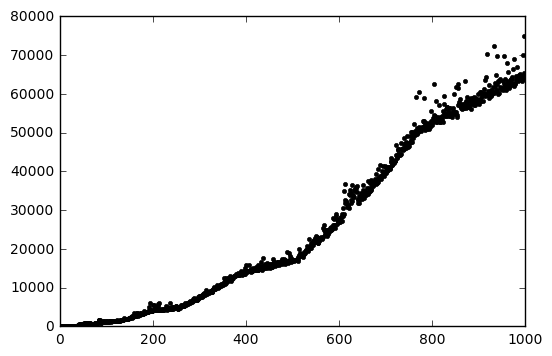

In [49]:
pl.clf()
x = np.arange(1000)
y = np.array(exper_analysis(1000))
pl.plot(x, y, 'k.')

<h1> Algoritmo J.K Bentley,1989</h1>

In [66]:
def max2(a,b):
    if(a>b):
        return a
    else:
        return b

def sub3(a,prim,ult):
    mitad=0
    i=0
    max_izq=0
    max_der=0
    suma=0
    max_aux=0
    if(prim>ult):
        return 0
    if(prim==ult):
        return max2(0,a[prim-1])
    mitad=(prim+ult)/2
    max_aux=max2(sub3(a,prim,mitad),sub3(a,mitad+1,ult))
    max_izq=0
    suma=0
    for i in range(mitad,prim,-1):
        suma=suma+a[i]
        max_izq=max2(max_izq,suma)
    max_der=0
    suma=0
    for i in range(mitad+1,ult):
        suma=suma+a[i]
        max_der=max2(max_der,suma)
    return max2(max_der+max_izq,max_aux)

In [68]:
A=[-2,11,-4,13,-5,-2]
print sub3(A,0,len(A))

20


In [80]:
import random as rnd
import time
def exper_analysis2(n):
    results = []
    results.append(0)
    results.append(0)
    for i in range(2,n):
        x = i
        arreglo = np.random.randint(-100,100,(x))
        #print arreglo
        rnd.shuffle(arreglo)
        tic = time.clock()
        a = sub3(arreglo,0,len(arreglo))
        #print "max ", a.maximo, " inicio ", a.i, " fin ",a.j
        toc = time.clock()
        results.append((toc-tic)*10000000)
    return results

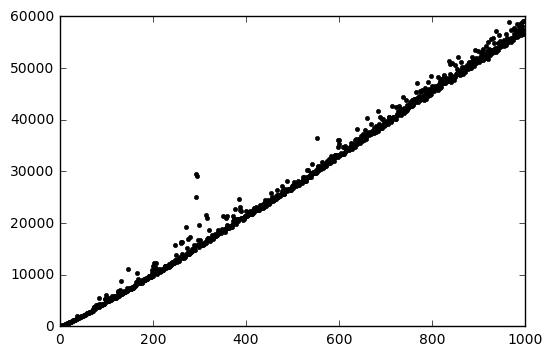

In [81]:
pl.clf()
x = np.arange(1000)
y = np.array(exper_analysis2(1000))
pl.plot(x, y, 'k.')

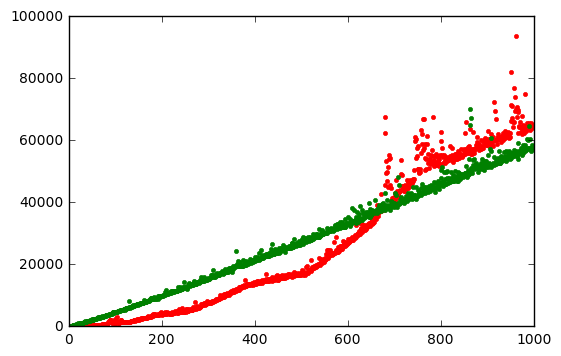

In [83]:
pl.clf()
x = np.arange(1000)
y = np.array(exper_analysis(1000))#Segundo punto
pl.plot(x, y, 'k.',color='red')  
y = np.array(exper_analysis2(1000)) #Tercer punto
pl.plot(x, y, 'k.',color='green') 